# Análise do Desenvolvimento Humano e Econômico Global

**Dataset:** Gapminder (1952–2007)

**Autores:**
- Gabriel Moscatel Fevrier 
- Carlos Eduardo Campos Penido
- Marcelo Rodrigues Ribeiro
- Ana Maria Moreira

---

## Introdução

Este notebook apresenta uma análise exploratória e interpretativa sobre o desenvolvimento humano e econômico global, com base no dataset Gapminder. 

O objetivo é investigar padrões temporais e espaciais das variáveis **expectativa de vida (lifeExp)**, **PIB per capita (gdpPercap)** e **população (pop)**, considerando a distribuição por continentes e por país ao longo do período de 1952 a 2007. 

As etapas incluem coleta, limpeza, visualizações, funções reutilizáveis, interpretações críticas e síntese de insights.

---

## 1. Coleta e carregamento dos dados

Carregamento do arquivo `gapminder_full.csv` e uma visão geral dos dados e tipos de dados.

In [1]:
# Carregamento das bibliotecas
import pandas as pd

# Carregamento do dataset bruto
ds_bruto = pd.read_csv('../datasets/gapminder_full.csv')

# Exibição das primeiras linhas do dataset
display(ds_bruto.head())

# Exibição das informações do dataset
display(ds_bruto.info())

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1736 non-null   object 
 1   year       1736 non-null   int64  
 2   pop        1736 non-null   float64
 3   continent  1736 non-null   object 
 4   lifeExp    1736 non-null   float64
 5   gdpPercap  1736 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 81.5+ KB


None

## 2. Limpeza de dados

Remoção de valores nulos e duplicados


In [2]:
# Limpeza do dataset (remoção de valores nulos e duplicados)
ds_limpo = ds_bruto.dropna().drop_duplicates().copy()

## 3. Análise exploratória inicial

Estatísticas descritivas das variáveis numéricas e observação da distribuição geral.

In [3]:
# Estatísticas descritivas
display(ds_limpo.describe().round(3))

# Distribuição por continente e anos disponíveis
print('\nContinentes presentes:', ds_limpo['continent'].unique())
print('Anos presentes (min, max):', ds_limpo['year'].min(), ds_limpo['year'].max())

,year,pop,lifeExp,gdpPercap
count,1704.000,1.704000e+03,1704.000,1704.000
mean,1979.500,2.960121e+07,59.474,7215.327
std,17.265,1.061579e+08,12.917,9857.455
min,1952.000,6.001100e+04,23.599,241.166
25%,1965.750,2.793664e+06,48.198,1202.060
50%,1979.500,7.023596e+06,60.712,3531.847
75%,1993.250,1.958522e+07,70.846,9325.462
max,2007.000,1.318683e+09,82.603,113523.133



Continentes presentes: ['Asia' 'Europe' 'Africa' 'Americas' 'Oceania']
Anos presentes (min, max): 1952 2007


## 4. Funções reutilizáveis para visualizações

Importação da biblioteca de gráficos

In [4]:
# Importação das bibliotecas do sistema
import sys
import os

# Adiciona o diretório pai ao sys.path para importar libs
sys.path.append(os.path.dirname(os.getcwd()))

#Importação da biblioteca de gráficos
import libs.graficos_lib as graficos

## 5. Análises e visualizações

A seguir apresentam-se diversas análises quantitativas e visuais, cada qual com uma breve interpretação.

### Análise 1 — Tendência temporal global da expectativa de vida

Calcula-se a média global de expectativa de vida por ano e plota-se a série temporal.

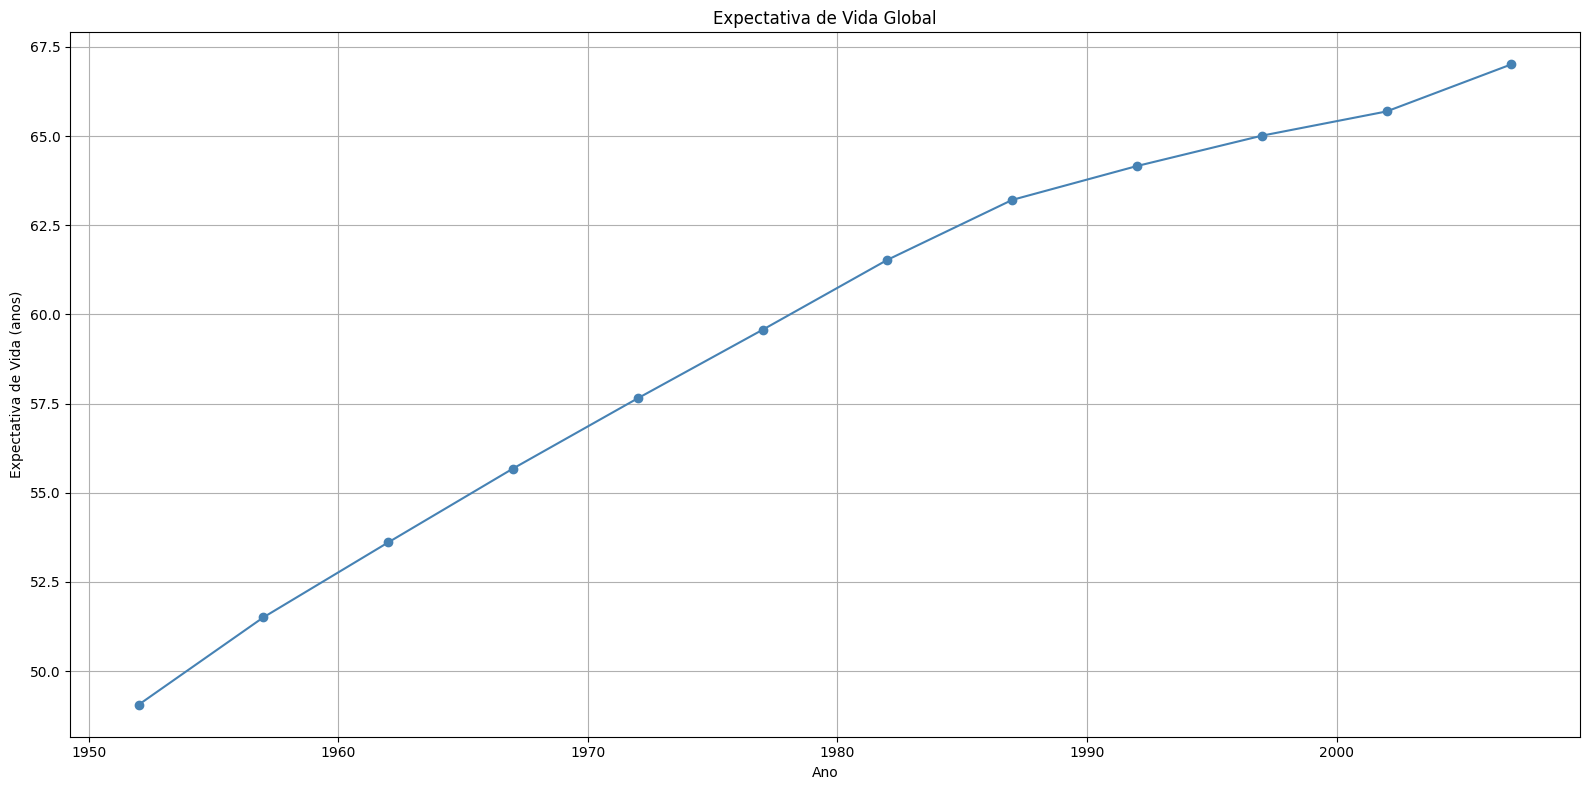

Interpretação: Observa-se um aumento consistente da expectativa de vida média global entre 1952 e 2007, refletindo avanços em saúde pública e nutrição.


In [5]:
# Cálculo da expectativa de vida média por ano
# Agrupamento por ano, cálculo da média da expectativa de vida, reset do índice, ordenação por ano e arredondamento para 2 casas decimais
ds_espec_global = ds_limpo.groupby('year')['lifeExp'].mean().reset_index().sort_values('year').round({'lifeExp': 2})

#Plotagem do gráfico de linhas mostrando a expectativa de vida global ao longo dos anos
graficos.plotar_grafico_linhas(ds_espec_global, 'year', 'lifeExp', None, 'Expectativa de Vida Global', 'Ano', 'Expectativa de Vida (anos)')

print('Interpretação: Observa-se um aumento consistente da expectativa de vida média global entre 1952 e 2007, refletindo avanços em saúde pública e nutrição.')

### Análise 2 — Tendência temporal global do PIB per capita (média)

Média do PIB por ano e representação da série temporal.

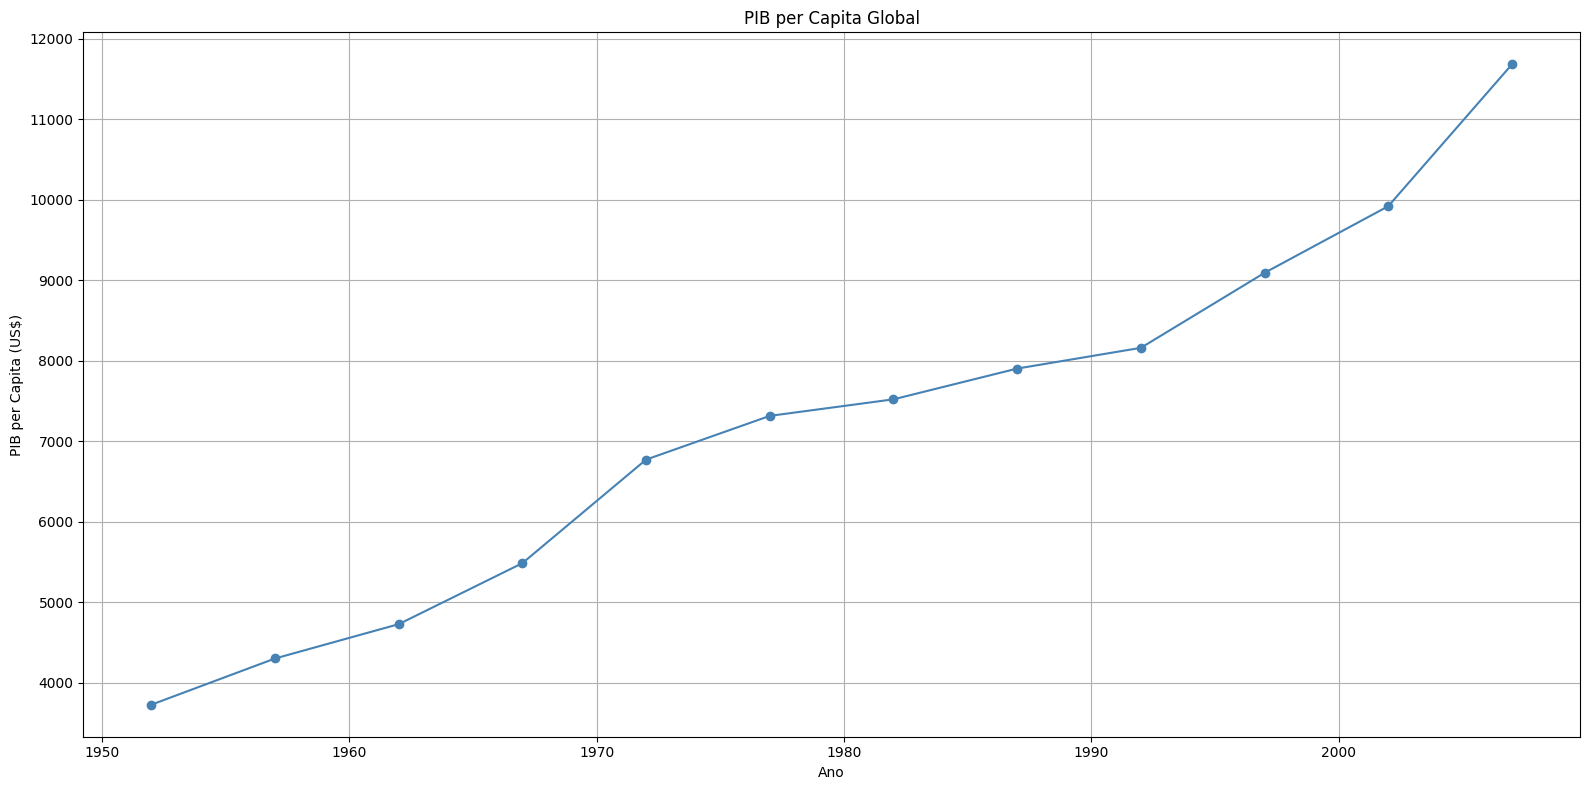

Interpretação: A média do PIB per capita apresenta crescimento.


In [6]:
# Cálculo do PIB per capita médio por ano
ds_pib_global = ds_limpo.groupby('year')['gdpPercap'].mean().reset_index()

#Plotagem do gráfico de linhas mostrando o PIB per capita global ao longo dos anos
graficos.plotar_grafico_linhas(ds_pib_global, 'year', 'gdpPercap', None, 'PIB per Capita Global', 'Ano', 'PIB per Capita (US$)')  

#Interpretação
print('Interpretação: A média do PIB per capita apresenta crescimento.')

### Análise 3 — Evolução populacional global

Soma da população por ano e sua evolução.

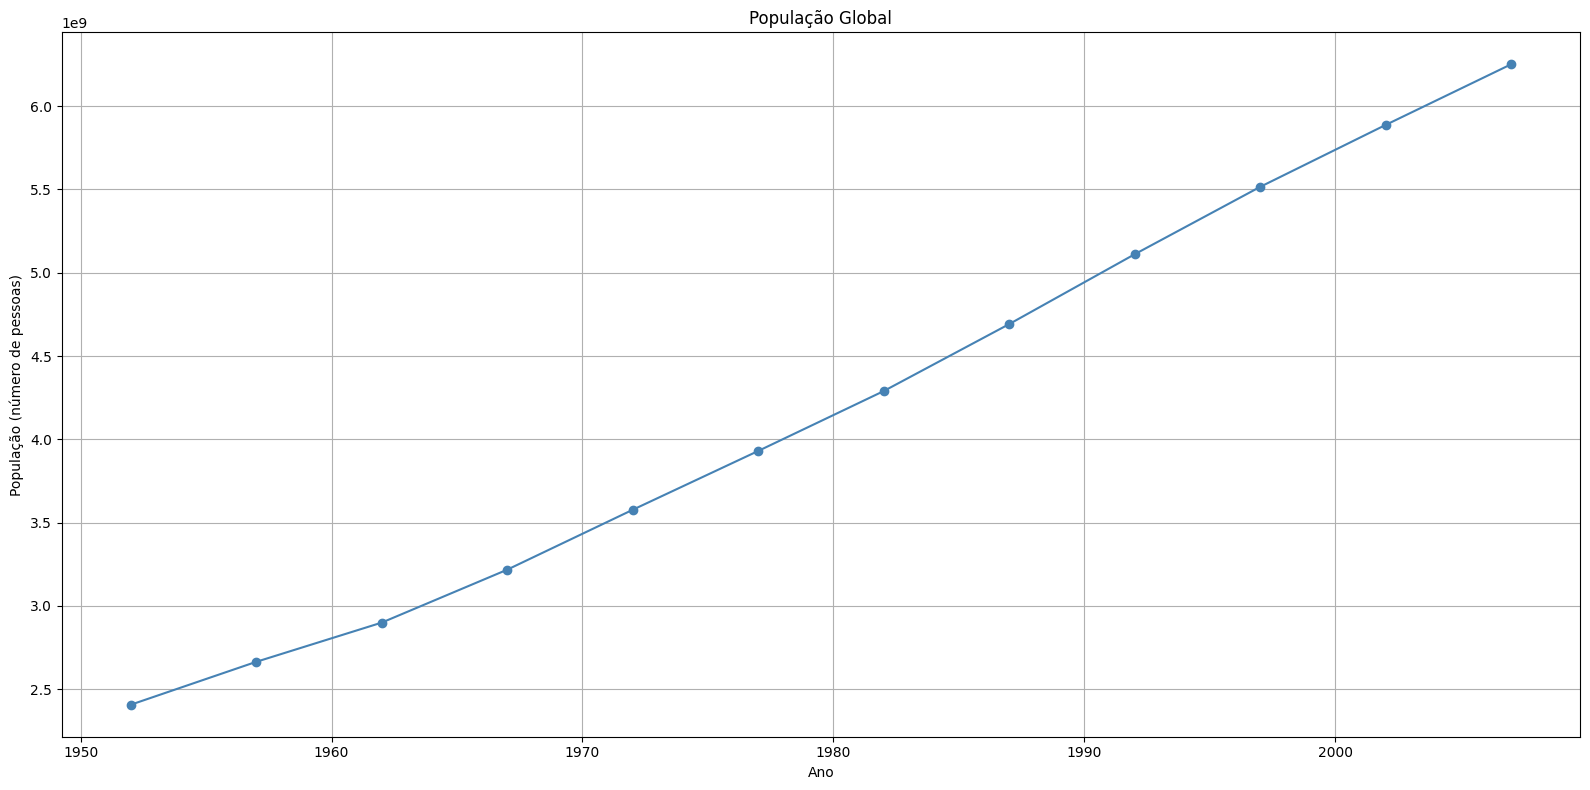

Interpretação: Verifica-se um aumento substancial da população global ao longo do período.


In [7]:
# Cálculo da população total por ano
ds_pop_global = ds_limpo.groupby('year')['pop'].sum().reset_index()

#Plotagem do gráfico de linhas mostrando a população global ao longo dos anos
graficos.plotar_grafico_linhas(ds_pop_global, 'year', 'pop', None, 'População Global', 'Ano', 'População (número de pessoas)')

#Interpretação
print('Interpretação: Verifica-se um aumento substancial da população global ao longo do período.')


### Análise 4 — Expectativa de vida por continente

Comparação das médias de expectativa de vida por continente ao longo dos anos.

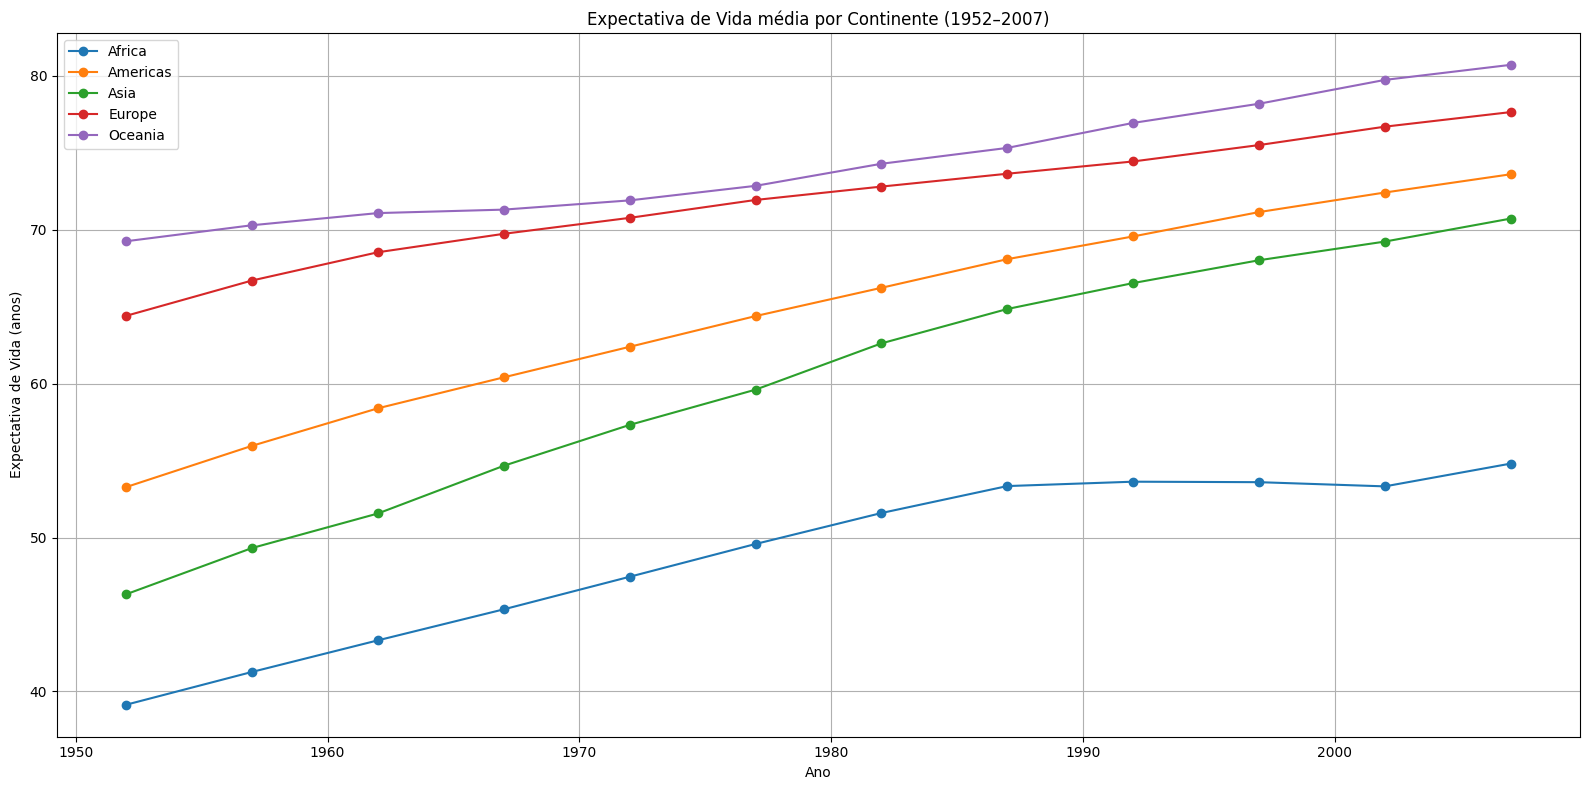

Interpretação: Existem diferenças claras entre continentes; alguns apresentam crescimento mais acentuado e outros partem de patamares mais baixos, evidenciando desigualdades regionais.


In [8]:
# Análise 4

# Cálculo da expectativa de vida média por continente e ano
exp_vida_continente = ds_limpo.groupby(['year','continent'])['lifeExp'].mean().reset_index()

# Plotagem do gráfico de linhas mostrando a expectativa de vida média por continente ao longo dos anos
graficos.plotar_grafico_linhas(exp_vida_continente, 'year', 'lifeExp', 'continent', 'Expectativa de Vida média por Continente (1952–2007)', 'Ano', 'Expectativa de Vida (anos)')

# Interpretação
print('Interpretação: Existem diferenças claras entre continentes; alguns apresentam crescimento mais acentuado e outros partem de patamares mais baixos, evidenciando desigualdades regionais.')

### Análise 5 — PIB per capita por continente

Evolução do PID médio por continente.

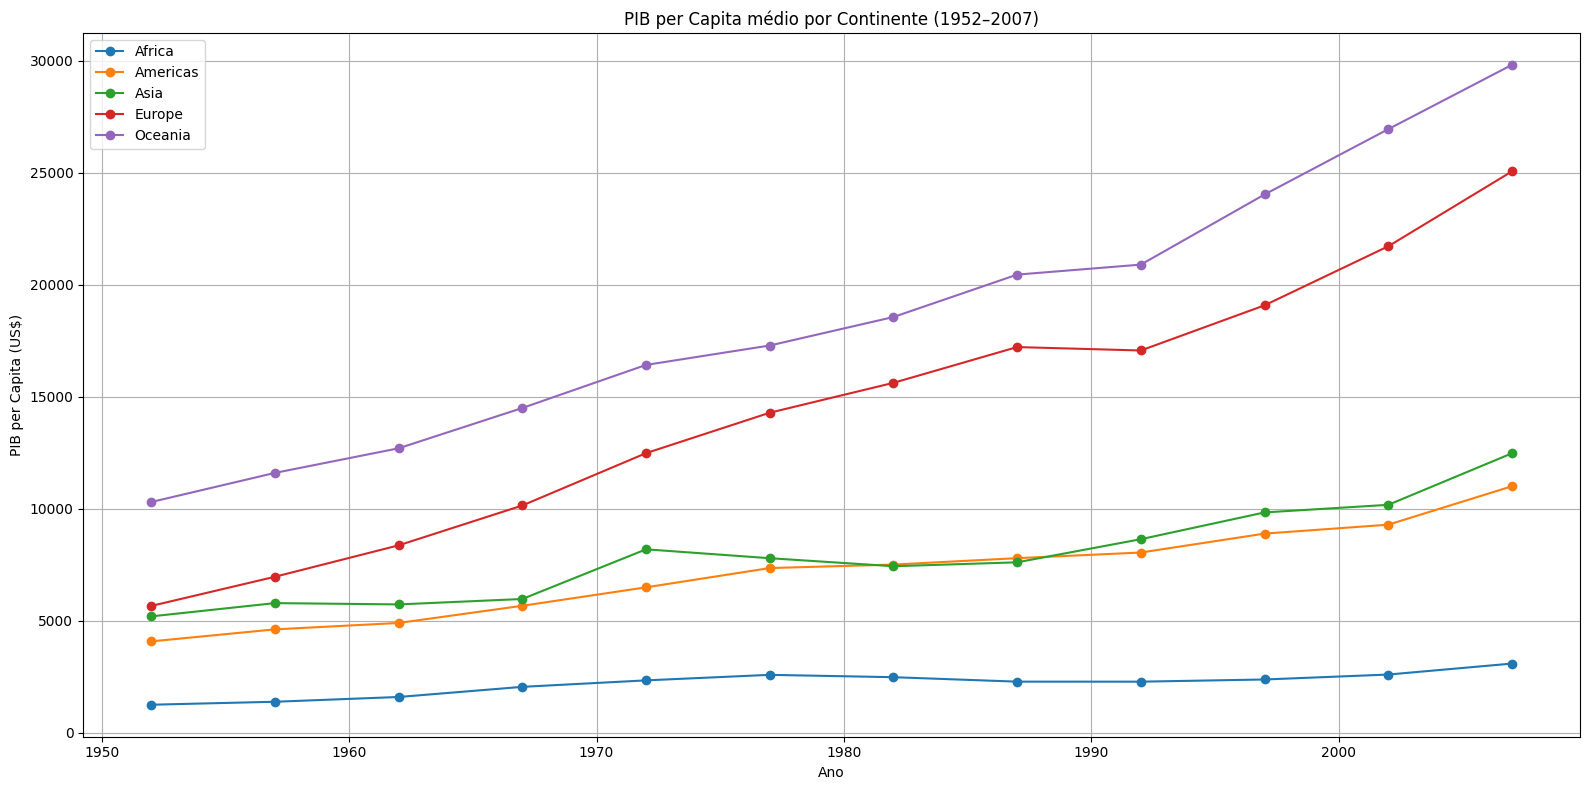

Interpretação: Continua a haver distinções marcantes entre continentes, com alguns apresentando crescimento econômico mais robusto do que outros ao longo do período analisado.


In [9]:
# Análise 5

# Cálculo do PIB per capita médio por continente e ano
pib_continente = ds_limpo.groupby(['year','continent'])['gdpPercap'].mean().reset_index()

# Plotagem do gráfico de linhas mostrando o PIB per capita médio por continente ao longo dos anos
graficos.plotar_grafico_linhas(pib_continente, 'year', 'gdpPercap', 'continent', 'PIB per Capita médio por Continente (1952–2007)', 'Ano', 'PIB per Capita (US$)')

# Interpretação
print('Interpretação: Continua a haver distinções marcantes entre continentes, com alguns apresentando crescimento econômico mais robusto do que outros ao longo do período analisado.')

### Análise 6 — Relação entre expectativa de vida e PIB per capita em 2007

Gráfico de dispersão com bolhas representando a população dos países no ano de 2007.

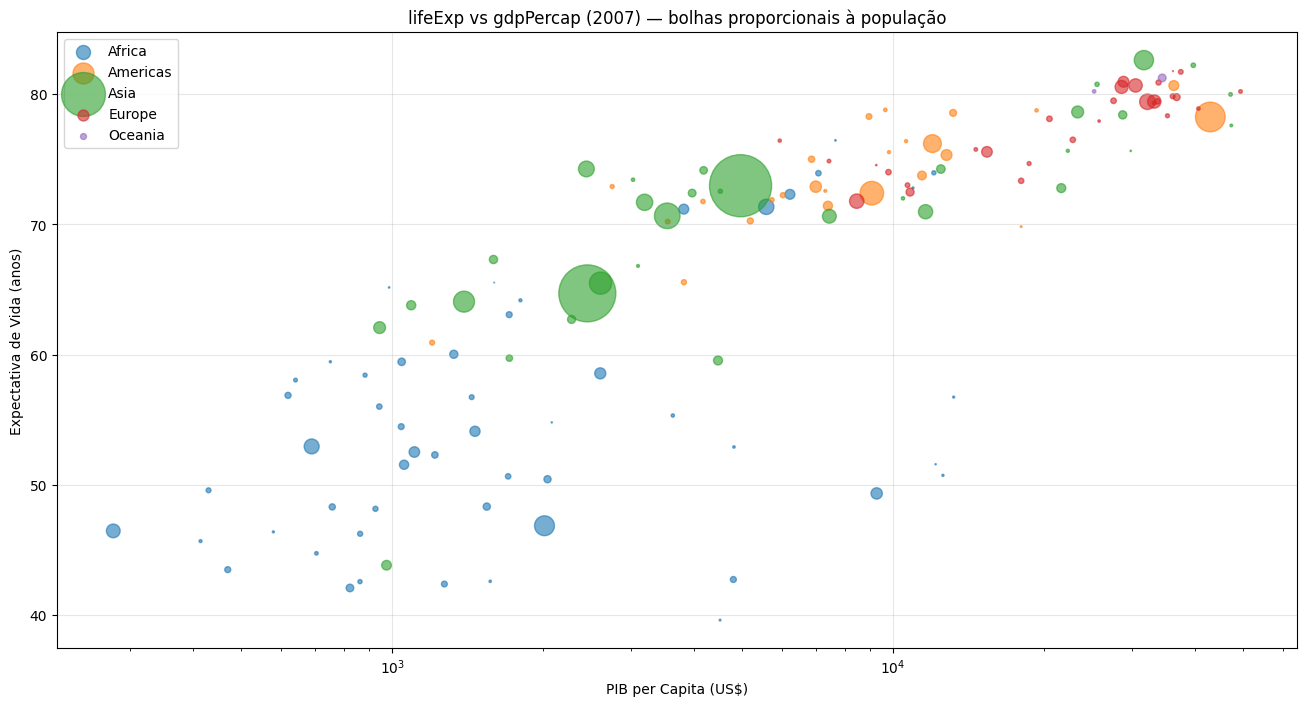

Interpretação: Observa-se correlação positiva entre PIB per capita e expectativa de vida, com países de maior renda apresentando, em geral, maior expectativa de vida. No entanto, há exceções e variações regionais.


In [10]:
# Análise 6

# Filtragem dos dados para o ano de 2007
ds_2007 = ds_limpo[ds_limpo['year']==2007].copy()

# Plotagem do gráfico de dispersão de bolhas para 2007
graficos.plotar_dispersao_bolhas(ds_2007, 'gdpPercap', 'lifeExp', size='pop', hue='continent', title='lifeExp vs gdpPercap (2007) — bolhas proporcionais à população', xlabel='PIB per Capita (US$)', ylabel='Expectativa de Vida (anos)', logx=True)

# Interpretação
print('Interpretação: Observa-se correlação positiva entre PIB per capita e expectativa de vida, com países de maior renda apresentando, em geral, maior expectativa de vida. No entanto, há exceções e variações regionais.')